In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
import numpy as np

from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# info

In [2]:
air = pd.read_csv('AirPassengers.csv')
air

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
air['Month'] = pd.to_datetime(air.Month)
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [5]:
air.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [6]:
air.set_index('Month', inplace=True)

<AxesSubplot: ylabel='Frequency'>

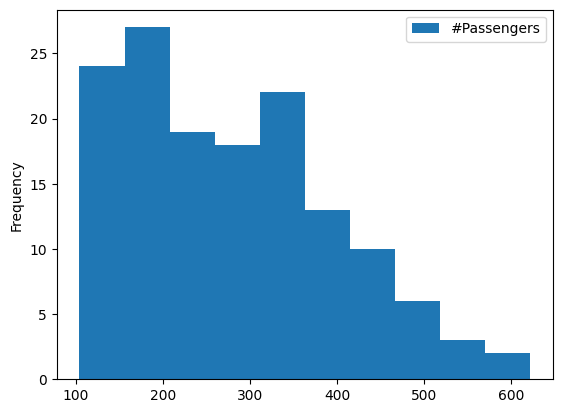

In [7]:
air.plot(kind='hist')

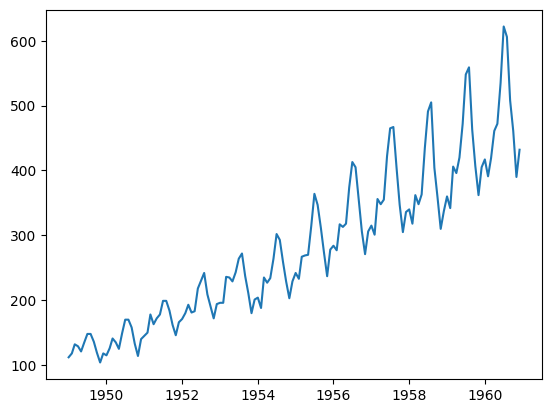

In [8]:
plt.plot(air)

In [9]:
air

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [10]:
rollingmean = air.rolling(window=10).mean()
rollingmeanstd = air.rolling(window=10).std()

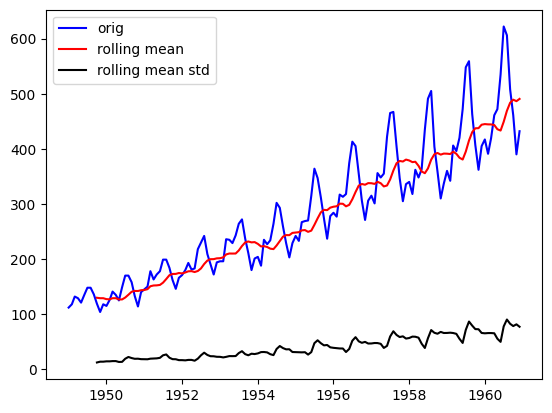

In [11]:
plt.plot(air, color='blue', label='orig')
plt.plot(rollingmean, color='red', label='rolling mean')
plt.plot(rollingmeanstd, color='black', label='rolling mean std')
plt.legend()

# adfuller

In [12]:
adfuller(air)

(0.815368879206052,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [13]:
p_value = adfuller(air)[1]
p_value

0.991880243437641

In [14]:
Test_Statistic = adfuller(air)[0]
Test_Statistic
# so since this is bigger than the 5% this is not stationary 
# and you can also look at the graph above


0.815368879206052

In [15]:
air['diff_p'] = air['#Passengers'].diff()
air

,#Passengers,diff_p
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
...,...,...
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0


In [16]:
adfuller(air.diff_p.dropna())

(-2.8292668241700047,
 0.05421329028382478,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854084)

In [17]:
air['diff_p2'] =  air.diff_p.diff()
air

,#Passengers,diff_p,diff_p2
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0
...,...,...,...
1960-08-01,606,-16.0,-103.0
1960-09-01,508,-98.0,-82.0
1960-10-01,461,-47.0,51.0


In [18]:
adfuller(air.diff_p2.dropna())

(-16.384231542468513,
 2.7328918500142003e-29,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.6020417275607)

<AxesSubplot: xlabel='Month'>

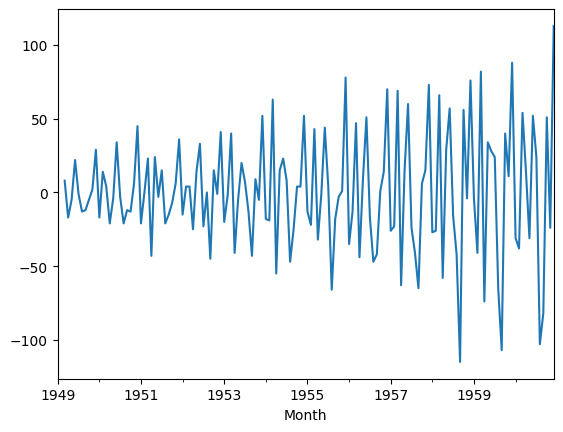

In [19]:
air.diff_p2.plot(kind='line')

In [20]:
air['log_pass'] = np.log(air['#Passengers'])
air

,#Passengers,diff_p,diff_p2,log_pass
Month,,,,
1949-01-01,112,NaN,NaN,4.718499
1949-02-01,118,6.0,NaN,4.770685
1949-03-01,132,14.0,8.0,4.882802
1949-04-01,129,-3.0,-17.0,4.859812
1949-05-01,121,-8.0,-5.0,4.795791
...,...,...,...,...
1960-08-01,606,-16.0,-103.0,6.406880
1960-09-01,508,-98.0,-82.0,6.230481
1960-10-01,461,-47.0,51.0,6.133398


In [21]:
np.log1p(air.log_pass)

Month
1949-01-01    1.743706
1949-02-01    1.752791
1949-03-01    1.772033
1949-04-01    1.768118
1949-05-01    1.757132
                ...   
1960-08-01    2.002409
1960-09-01    1.978306
1960-10-01    1.964788
1960-11-01    1.941062
1960-12-01    1.955638
Name: log_pass, Length: 144, dtype: float64

<AxesSubplot: xlabel='Month'>

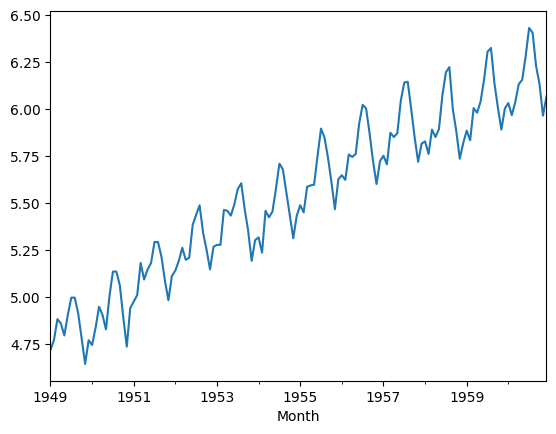

In [22]:
air.log_pass.plot(kind='line')

In [23]:
air['log_pass_diff']= air['log_pass'].diff()
air

,#Passengers,diff_p,diff_p2,log_pass,log_pass_diff
Month,,,,,
1949-01-01,112,NaN,NaN,4.718499,NaN
1949-02-01,118,6.0,NaN,4.770685,0.052186
1949-03-01,132,14.0,8.0,4.882802,0.112117
1949-04-01,129,-3.0,-17.0,4.859812,-0.022990
1949-05-01,121,-8.0,-5.0,4.795791,-0.064022
...,...,...,...,...,...
1960-08-01,606,-16.0,-103.0,6.406880,-0.026060
1960-09-01,508,-98.0,-82.0,6.230481,-0.176399
1960-10-01,461,-47.0,51.0,6.133398,-0.097083


<AxesSubplot: xlabel='Month'>

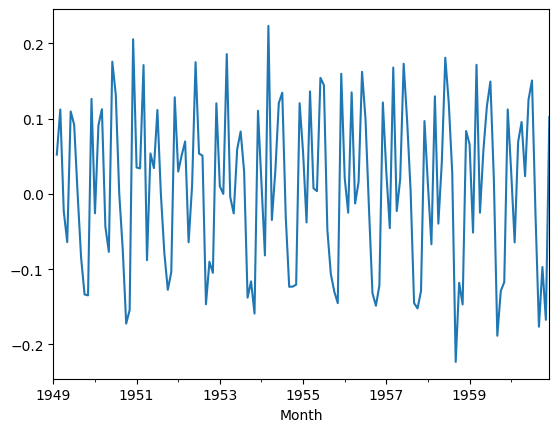

In [24]:
air.log_pass_diff.plot(kind='line')

In [25]:
adfuller(air.log_pass_diff.dropna())

(-2.7171305983881293,
 0.0711205481508593,
 14,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 -440.35846985568105)

In [26]:
air['log_pass_diff2'] = air.log_pass_diff.diff()
air

,#Passengers,diff_p,diff_p2,log_pass,log_pass_diff,log_pass_diff2
Month,,,,,,
1949-01-01,112,NaN,NaN,4.718499,NaN,NaN
1949-02-01,118,6.0,NaN,4.770685,0.052186,NaN
1949-03-01,132,14.0,8.0,4.882802,0.112117,0.059932
1949-04-01,129,-3.0,-17.0,4.859812,-0.022990,-0.135107
1949-05-01,121,-8.0,-5.0,4.795791,-0.064022,-0.041032
...,...,...,...,...,...,...
1960-08-01,606,-16.0,-103.0,6.406880,-0.026060,-0.176733
1960-09-01,508,-98.0,-82.0,6.230481,-0.176399,-0.150338
1960-10-01,461,-47.0,51.0,6.133398,-0.097083,0.079315


<AxesSubplot: xlabel='Month'>

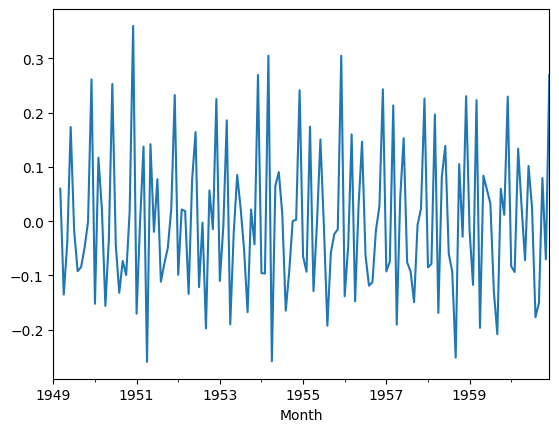

In [27]:
air.log_pass_diff2.plot(kind='line')

In [28]:
air

,#Passengers,diff_p,diff_p2,log_pass,log_pass_diff,log_pass_diff2
Month,,,,,,
1949-01-01,112,NaN,NaN,4.718499,NaN,NaN
1949-02-01,118,6.0,NaN,4.770685,0.052186,NaN
1949-03-01,132,14.0,8.0,4.882802,0.112117,0.059932
1949-04-01,129,-3.0,-17.0,4.859812,-0.022990,-0.135107
1949-05-01,121,-8.0,-5.0,4.795791,-0.064022,-0.041032
...,...,...,...,...,...,...
1960-08-01,606,-16.0,-103.0,6.406880,-0.026060,-0.176733
1960-09-01,508,-98.0,-82.0,6.230481,-0.176399,-0.150338
1960-10-01,461,-47.0,51.0,6.133398,-0.097083,0.079315


In [29]:
air['#Passengers']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

# Arima

In [30]:
model = ARIMA(air['#Passengers'], order=(2,1,1)) # p,d,q for order 
arima_model = model.fit()

/Users/yanellyhernandez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/yanellyhernandez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/yanellyhernandez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [31]:
arima_model.forecast(5)

1961-01-01    471.000383
1961-02-01    492.998177
1961-03-01    497.918890
1961-04-01    492.528738
1961-05-01    484.243730
Freq: MS, Name: predicted_mean, dtype: float64

In [32]:
air

,#Passengers,diff_p,diff_p2,log_pass,log_pass_diff,log_pass_diff2
Month,,,,,,
1949-01-01,112,NaN,NaN,4.718499,NaN,NaN
1949-02-01,118,6.0,NaN,4.770685,0.052186,NaN
1949-03-01,132,14.0,8.0,4.882802,0.112117,0.059932
1949-04-01,129,-3.0,-17.0,4.859812,-0.022990,-0.135107
1949-05-01,121,-8.0,-5.0,4.795791,-0.064022,-0.041032
...,...,...,...,...,...,...
1960-08-01,606,-16.0,-103.0,6.406880,-0.026060,-0.176733
1960-09-01,508,-98.0,-82.0,6.230481,-0.176399,-0.150338
1960-10-01,461,-47.0,51.0,6.133398,-0.097083,0.079315


In [33]:
ts = air[['#Passengers']].loc[:'1960-07-01']
ts

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-03-01,419
1960-04-01,461
1960-05-01,472


In [34]:
test = air[['#Passengers']].loc['1960-08-01':]
test

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [35]:
model1 = ARIMA(ts['#Passengers'], order=(2,1,2)) # p,d,q for order 
arima_model1 = model1.fit()

/Users/yanellyhernandez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/yanellyhernandez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/yanellyhernandez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/yanellyhernandez/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [36]:
pred = arima_model1.forecast(5)
pred

1960-08-01    601.189048
1960-09-01    558.580145
1960-10-01    506.191469
1960-11-01    458.279792
1960-12-01    427.473631
Freq: MS, Name: predicted_mean, dtype: float64

# evaluation of model

In [37]:
mean_squared_error(test, pred, squared=False)

/Users/yanellyhernandez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


43.14251553110833

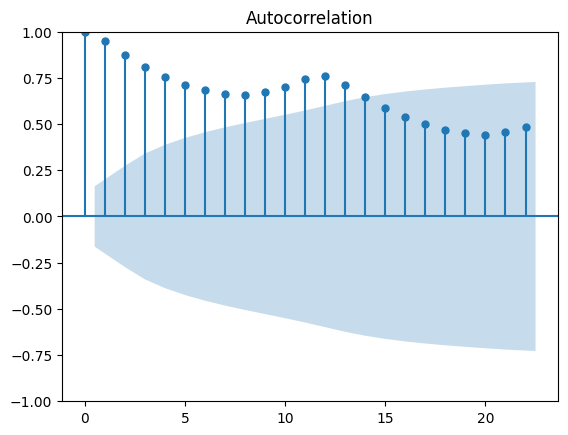

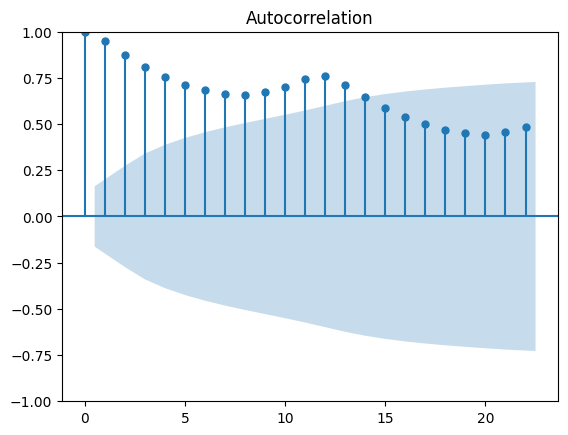

In [39]:
plot_acf(air['#Passengers'])

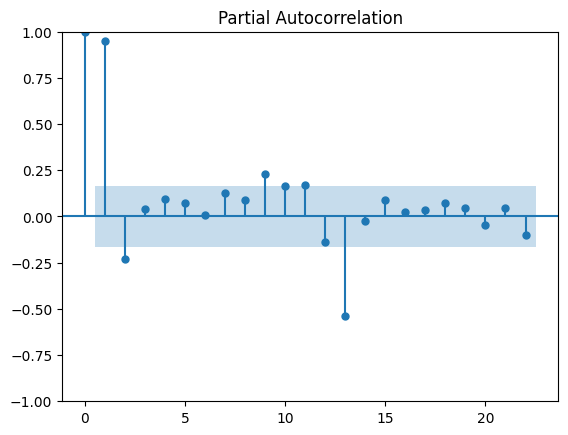

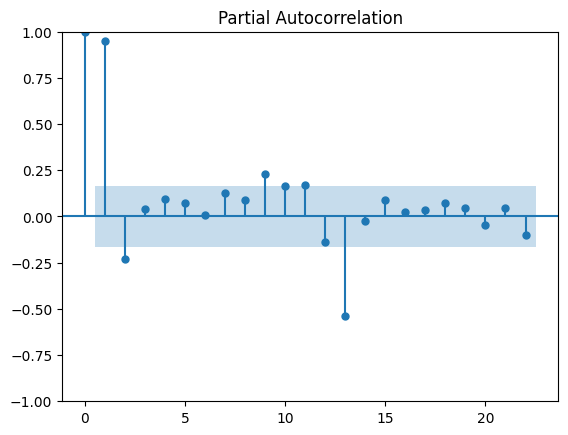

In [41]:
plot_pacf(air['#Passengers'])